# Algorithme de Grover - La bibliothèque quantique

Bob est victime d’un mauvais sort. Vous savez que le rituel pour lever cette malédiction est consigné dans un grimoire qui se trouve dans une bibliothèque quantique. Le problème est que dans une bibliothèque quantique, l’emprunt se fait toujours au hasard. Afin de maximiser vos chances d’emprunter le bon grimoire et ainsi lever le mauvais sort qui afflige Bob, vous utiliserez l’algorithme de Grover, la probabilité d’amplitude et l’interférence.

# Imports

In [50]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Création du circuit de l'énigme

On place des porte Hadamard sur q0 et q1 pour que tout les grimoires ai la même probabilité d'être empruntés.

In [51]:
circ = QuantumCircuit(2)
circ.h(0)
circ.h(1)
circ.barrier()

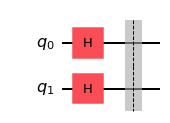

In [52]:
circ.draw("mpl", style="iqx")

Les 2 qbits représentent les 4 grimoires de la bibliothèque.

# Marquage du bon grimoire par Aïka

In [70]:
# Pour marquer le grimoire 1 par exemple, on inverse la phase de cet état
# On applique des portes X suivies d'une porte CZ et on termine par des portes X

grimoire = 3
if grimoire == 1:
    circ = QuantumCircuit(2)
    circ.h(0)
    circ.h(1)
    circ.barrier()
    circ.x(0)
    circ.cz(0, 1)
    circ.x(0)
elif grimoire == 2:
    circ = QuantumCircuit(2)
    circ.h(0)
    circ.h(1)
    circ.barrier()
    circ.x(1)
    circ.cz(0, 1)
    circ.x(1)
elif grimoire == 3:
    circ = QuantumCircuit(2)
    circ.h(0)
    circ.h(1)
    circ.barrier()
    circ.x(0)
    circ.x(1)
    circ.cz(0, 1)
    circ.x(0)
    circ.x(1)
elif grimoire == 4:
    circ = QuantumCircuit(2)
    circ.h(0)
    circ.h(1)
    circ.barrier()
    circ.cz(0, 1)
    circ.barrier()

Remarque : Cette partie doit être répétée pour chaque grimoire avec les portes appropriées, modifier la variable grimoire pour tester les différents cas.

# Le diffuseur de Grover

In [71]:
# Le diffuseur permet de mettre à zéro les probabilités de tous les grimoires sauf celui marqué
circ.h(0)
circ.h(1)
circ.z(0)
circ.z(1)
circ.cz(0, 1)
circ.h(0)
circ.h(1)
circ.barrier()

# Simulation du circuit

In [72]:
# Ajout de la mesure sur tous les qubits
circ.measure_all()
# Préparation du simulateur
simulator = Aer.get_backend('aer_simulator')
# Transpilation du circuit pour le simulateur
circ = transpile(circ, simulator)
# Exécution de la simulation
result = simulator.run(circ).result()
# Récupération des résultats
counts = result.get_counts(circ)

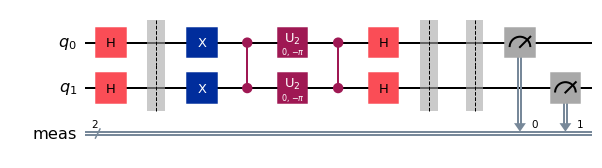

In [73]:
circ.draw("mpl", style="iqx")

# Visualisation des résultats

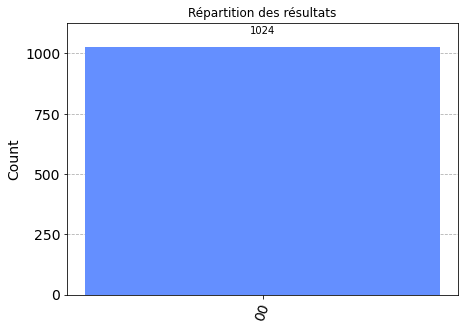

In [74]:
# Affichage d'un histogramme des résultats
plot_histogram(counts, title="Répartition des résultats")

Et on répète l'opération pour chaque grimoire

l'algorithme de Grover est utilisé pour résoudre le problème de la recherche d'un grimoire spécifique dans une bibliothèque quantique, en créant une superposition d'états et en inversant la phase du bon grimoire. Cela conduit à une amplification de la probabilité de mesurer l'état souhaité.